In [48]:
import pynapple as nap
from pathlib import Path

In [61]:

nwb_path = Path("/data_store2/neuropixels/nwb/NP134_B2.nwb")
data = nap.load_file(nwb_path)

In [ ]:
print(data)
spike_times = data["NP134_B2_g0_imec2_KS4"]

NP134_B2
┍━━━━━━━━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━┑
│ Keys                    │ Type        │
┝━━━━━━━━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━┥
│ TaskTimes               │ IntervalSet │
│ TaskStims               │ IntervalSet │
│ TaskCues                │ IntervalSet │
│ StimSpeechWords         │ IntervalSet │
│ StimSpeechTrials        │ IntervalSet │
│ StimSpeechPhones        │ IntervalSet │
│ ProdSpeechWords         │ IntervalSet │
│ ProdSpeechTrials        │ IntervalSet │
│ ProdSpeechPhones        │ IntervalSet │
│ KilosortSortTimes       │ IntervalSet │
│ pitch                   │ TsdFrame    │
│ intensity               │ TsdFrame    │
│ artics_new              │ TsdFrame    │
│ NP134_B2_g0_imec3_KS4   │ TsGroup     │
│ NP134_B2_g0_imec2_KS4   │ TsGroup     │
│ NP134_B2_g0_imec1_KS4   │ TsGroup     │
│ NP134_B2_g0_imec0_KS4   │ TsGroup     │
│ TimeSeriesNIDQ          │ TsdFrame    │
│ ElectricalSeriesLFImec3 │ TsdFrame    │
│ ElectricalSeriesLFImec2 │ TsdFrame    │
│ ElectricalSeriesLFImec1

/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/base_class.py:60: UserWarning: Some epochs have no duration
  self.time_support = IntervalSet(start=self.index[0], end=self.index[-1])
/userdata/ekato/miniforge3/envs/se2nwb/lib/python3.10/site-packages/pynapple/core/base_class.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  self.rate = self.index.shape[0] / np.sum(


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

print(spike_times)
KSLabels = spike_times.metadata["KSLabel_repeat"]
firingRates = spike_times.metadata["rate"]
contamPct = spike_times.metadata["ContamPct"]

mask1 = firingRates>0.5
mask2 = contamPct<10
mask3 = KSLabels=="good"
combined_mask = mask1 & mask2 & mask3
indices = firingRates[combined_mask].index

# now apply ISI violation criteria to narrow down good neurons
violationThreshold = 3/1000 #for 3 ms isi refractory period, lit standard
violationPct = np.zeros(len(indices))
ct = 0;
for i in indices:
    unit = spike_times[i]
    unit = unit.as_series().index
    isi = unit.diff()[1:len(unit)]
    violations = np.where(isi<violationThreshold)
    violations = np.array(violations)
    violationPct[ct] = violations.size/len(isi)
    ct += 1
# plt.hist(violationPct, bins = 20)
mask = violationPct<3/100 # throwing out neurons with > 3% isi violations
indicesFinal = indices[mask]
print(len(indicesFinal))
firingRates_final = firingRates[indicesFinal]
# plt.hist(firingRates_final, bins=20)

# early criteria for unit selection
# 1) firing rate > 0.5 ms [necessary for assembly code]
# 2) contamPct < 10%, maybe too liberal and can restrict after talking to Quinn prn
# 3) kilosort "good" 
# 4) isi violations < 5%, can check what I used before but should be fine
# 128_B1: 20


Index    rate      unit_name    KSLabel    ContamPct    Amplitude    KSLabel_repeat    original_cluster_id    ...
-------  --------  -----------  ---------  -----------  -----------  ----------------  ---------------------  -----
0        0.86625   0            good       16.1         14.1         good              0                      ...
1        0.09625   1            good       0.0          17.0         good              1                      ...
2        0.06125   2            good       0.0          29.7         good              2                      ...
3        0.58969   3            good       0.0          10.1         good              3                      ...
4        2.07219   4            good       12.5         16.1         good              4                      ...
5        1.32406   5            good       0.0          44.4         good              5                      ...
6        1.49313   6            good       7.3          15.5         good             

Feature means: [-8.27356868e-14 -5.49039616e-14 -5.25414785e-14  6.23961026e-14
  1.44453199e-15 -1.37741784e-14  1.05626275e-13 -1.69510020e-13
 -5.93854080e-14 -5.92167708e-14  1.71218218e-13 -2.15184181e-14
  1.44944278e-13  6.73286032e-14 -2.29626201e-14  8.96210883e-15
  6.06739789e-15  4.62187059e-14 -1.19248942e-13  5.90439720e-15
 -1.86642824e-13  3.83975771e-13 -2.38243917e-13 -2.96797899e-14
 -1.72677909e-14 -4.52480761e-14 -3.00129904e-14 -6.78800276e-14
 -8.89799957e-14  2.13099413e-13 -7.01935836e-14  1.23502784e-13
  4.07037223e-14 -3.79649714e-14  1.82393614e-14  2.10488724e-13
  1.84965888e-13  4.37128419e-14  1.66513450e-13 -3.99316372e-13
  2.35122335e-13 -6.26989970e-14 -6.28646592e-14  8.27818716e-17
  8.71185806e-15 -1.82116895e-14 -8.38521164e-14  1.30448291e-13
 -2.95663806e-13  1.04340698e-13  4.42575809e-14  8.96546945e-14
 -7.64526602e-14  1.68294795e-13 -1.58590565e-13 -2.58912162e-13
 -1.22495281e-13  1.52930666e-13  3.76530356e-13 -8.38044963e-14
  3.283796

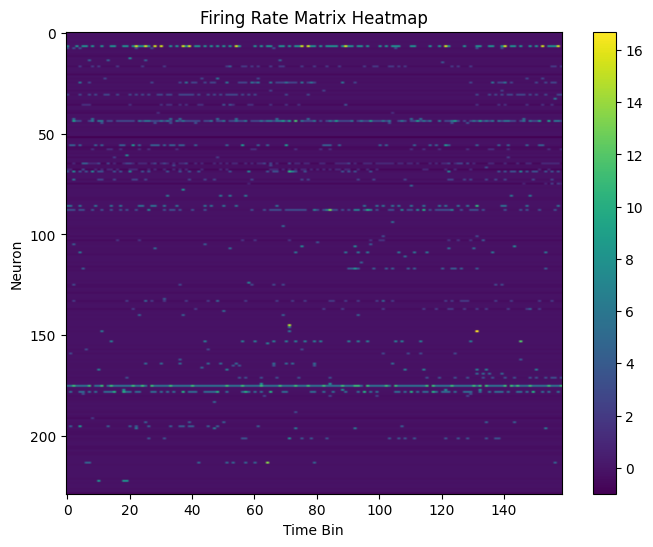

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# now restrict spike times to the good neurons
spike_times_good = spike_times[indicesFinal]
# print(spike_times_good)

# make spike count matrix
timescale = 25/1000;
spikeCountMatrix = spike_times_good.count(bin_size=timescale)
spikeCountMatrix = spikeCountMatrix.values # matrix in spike counts
firingRateMatrix = spikeCountMatrix/timescale # matrix in Hz
firingRateMatrix = stats.zscore(firingRateMatrix, axis=0) # zscore across time (within neuron)

# Verify standardization worked
print("Feature means:", np.mean(firingRateMatrix, axis=0))  # Should be ~0
print("Feature stds:", np.std(firingRateMatrix, axis=0))    # Should be ~1

# Check total variance
total_variance = np.sum(np.var(firingRateMatrix, axis=0))
print("Total variance:", total_variance)
print("Number of features:", firingRateMatrix.shape[1])
print("Should match:", firingRateMatrix.shape[1])

# visualize the first s seconds of the firing rate matrix
s = 4
matrixDisplay = firingRateMatrix[1:40*s,:]
plt.figure(figsize=(8, 6))
plt.imshow(matrixDisplay.T, aspect='auto', cmap='viridis')
plt.colorbar()
plt.xlabel('Time Bin')
plt.ylabel('Neuron')
plt.title('Firing Rate Matrix Heatmap')
plt.show()

Sum of eigenvalues: 229.0017890764822
Should equal total variance: 229.00000000001654
Original shape: (128000, 229)
PCA shape: (128000, 229)
Explained variance ratio: [0.0478547  0.02030108 0.0168484  0.01312451 0.0115988  0.01014133
 0.01001047 0.00969778 0.00943834 0.00817024 0.00735775 0.00717234
 0.00660275 0.00643609 0.00623635 0.00605941 0.00593852 0.00581395
 0.00575258 0.00565679 0.00552602 0.00537361 0.00534179 0.00525255
 0.00520764 0.00514579 0.00505642 0.00500958 0.00497381 0.00491398
 0.00488985 0.00481107 0.00479032 0.00477939 0.00474941 0.00471847
 0.00469224 0.00466259 0.00465215 0.00462194 0.00461091 0.00458115
 0.00455756 0.0045304  0.00452439 0.0044819  0.00447931 0.00447176
 0.00445523 0.00444536 0.00442634 0.00440127 0.0043967  0.00438801
 0.00437655 0.00437056 0.00436241 0.00434574 0.00432881 0.00431151
 0.00430957 0.00429893 0.00428711 0.00428254 0.00428104 0.00426772
 0.00426097 0.00424839 0.00423837 0.00422877 0.00421958 0.00421342
 0.00420329 0.00419385 0.0041

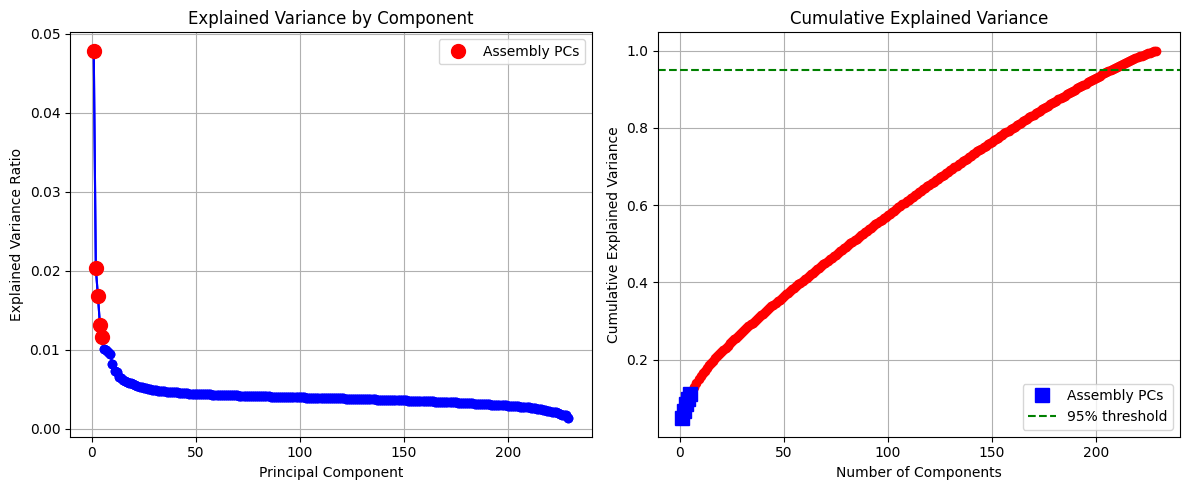

In [ ]:
# now run pca on firing rate matrix
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# create PCA object
pca = PCA()

# fit and transform data
# note don't have to center bc each row is zscores so center of matrix is 0
firingRateMatrix_pca = pca.fit_transform(firingRateMatrix)

# Check eigenvalue sum
eigenvalues = pca.explained_variance_ 
print("Sum of eigenvalues:", np.sum(eigenvalues))
print("Should equal total variance:", total_variance)

# print results
print("Original shape:", firingRateMatrix.shape)
print("PCA shape:", firingRateMatrix_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", np.cumsum(pca.explained_variance_ratio_))

# calculate the upperbound of the Marchenko-Pastur law, eigenvalues above the 
# upper bound are patterns that will be considered "assemblies"
upperbound = (1+np.sqrt(firingRateMatrix.shape[1]/firingRateMatrix.shape[0]))**2

# classic definition
# assemblyIndices = np.where(eigenvalues>upperbound)

# more stringent definition
assemblyIndices = np.where((eigenvalues > upperbound) & (eigenvalues > np.mean(eigenvalues) + np.std(eigenvalues) * 2))

assemblyEigenvalues = eigenvalues[assemblyIndices]
print(upperbound)
print(assemblyEigenvalues)

# Plot explained variance
plt.figure(figsize=(12, 5))

# Plot 1: Explained variance ratio
plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_, 'bo-')
explained_var = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_var) + 1), explained_var, 'bo-')
plt.plot(range(1, len(assemblyEigenvalues)+1), explained_var[:len(assemblyEigenvalues)], 'ro', markersize=10, label='Assembly PCs')
plt.legend()
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')
plt.grid(True)

# Plot 2: Cumulative explained variance
plt.subplot(1, 2, 2)
cumulative_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, 'ro-')
highlight_n = len(assemblyEigenvalues)
plt.plot(range(1, highlight_n + 1), cumulative_var[:highlight_n], 'bs', markersize=10, label='Assembly PCs')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Original projections shape: (83480, 10)
ICA components shape: (83480, 10)
Mixing matrix shape: (10, 10)
Unmixing matrix shape: (10, 10)
Reconstruction error: 1.967430821329158e-30


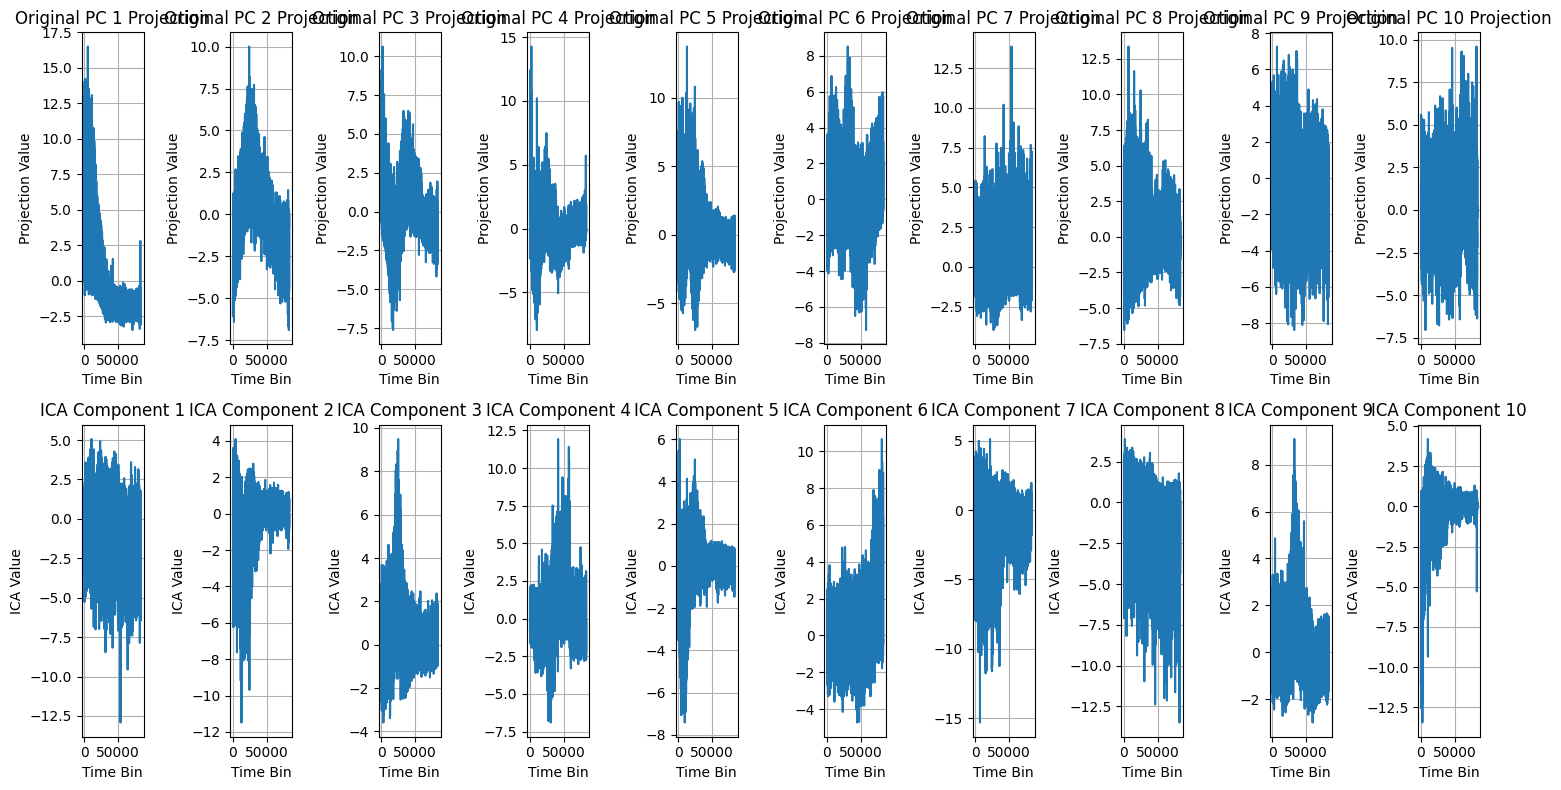


=== Statistical Comparison ===
Original PC projections:
PC 1: Skewness=1.695, Kurtosis=2.039
PC 2: Skewness=0.529, Kurtosis=0.269
PC 3: Skewness=0.422, Kurtosis=1.541
PC 4: Skewness=0.989, Kurtosis=7.721
PC 5: Skewness=0.903, Kurtosis=6.538
PC 6: Skewness=0.393, Kurtosis=2.232
PC 7: Skewness=1.656, Kurtosis=4.863
PC 8: Skewness=0.902, Kurtosis=5.833
PC 9: Skewness=-0.711, Kurtosis=4.092
PC 10: Skewness=0.119, Kurtosis=3.856

ICA components:
IC 1: Skewness=-1.481, Kurtosis=5.511
IC 2: Skewness=-2.302, Kurtosis=8.152
IC 3: Skewness=2.033, Kurtosis=6.018
IC 4: Skewness=1.410, Kurtosis=6.739
IC 5: Skewness=-2.286, Kurtosis=6.445
IC 6: Skewness=1.602, Kurtosis=5.861
IC 7: Skewness=-2.482, Kurtosis=15.000
IC 8: Skewness=-2.703, Kurtosis=13.188
IC 9: Skewness=1.459, Kurtosis=3.146
IC 10: Skewness=-4.186, Kurtosis=24.346

=== Independence Check ===
ICA components correlation matrix:
[[ 1.00000000e+00 -3.54345739e-16  5.55122152e-16 -9.57036718e-16
  -8.17745488e-17  4.35109543e-16  1.48930540

In [54]:
# now run ICA on PCA result
from sklearn.decomposition import FastICA
import numpy as np

# only get the assembly pca patterns
n_pcs = len(assemblyEigenvalues) # only want the above threshold patterns
pc_vectors = pca.components_[:n_pcs, :]

# project the assembly pca patterns onto the firing rate matrix
projections = firingRateMatrix @ pc_vectors.T

# visualize the assembly pattern activity across the recording
print(f"Original projections shape: {projections.shape}")

# define and run the ICA
fastica = FastICA(
    n_components=n_pcs,
    algorithm='parallel',
    whiten='unit-variance',
    max_iter=500,
    tol=1e-7,
    random_state=1
)
ica_components = fastica.fit_transform(projections)
print(f"ICA components shape: {ica_components.shape}")

# get mixing and unmixing matrices
mixing_matrix = fastica.mixing_
unmixing_matrix = fastica.components_
print(f"Mixing matrix shape: {mixing_matrix.shape}")
print(f"Unmixing matrix shape: {unmixing_matrix.shape}")

# Check reconstruction quality
reconstructed_projections = fastica.inverse_transform(ica_components)
reconstruction_error = np.mean((projections - reconstructed_projections)**2)
print(f"Reconstruction error: {reconstruction_error}")

# Visualize the original PC projections vs ICA components
fig, axes = plt.subplots(2, n_pcs, figsize=(15, 8))

# Plot original PC projections
for i in range(n_pcs):
    axes[0, i].plot(projections[:, i])
    axes[0, i].set_title(f'Original PC {i+1} Projection')
    axes[0, i].set_xlabel('Time Bin')
    axes[0, i].set_ylabel('Projection Value')
    axes[0, i].grid(True)

# Plot ICA components
for i in range(n_pcs):
    axes[1, i].plot(ica_components[:, i])
    axes[1, i].set_title(f'ICA Component {i+1}')
    axes[1, i].set_xlabel('Time Bin')
    axes[1, i].set_ylabel('ICA Value')
    axes[1, i].grid(True)
plt.tight_layout()
plt.show()

# Compare the statistical properties
print("\n=== Statistical Comparison ===")
print("Original PC projections:")
for i in range(n_pcs):
    skewness = stats.skew(projections[:, i])
    kurtosis = stats.kurtosis(projections[:, i])
    print(f"PC {i+1}: Skewness={skewness:.3f}, Kurtosis={kurtosis:.3f}")

print("\nICA components:")
for i in range(n_pcs):
    skewness = stats.skew(ica_components[:, i])
    kurtosis = stats.kurtosis(ica_components[:, i])
    print(f"IC {i+1}: Skewness={skewness:.3f}, Kurtosis={kurtosis:.3f}")

# Check independence (ICA should make components more independent)
print("\n=== Independence Check ===")
correlation_matrix = np.corrcoef(ica_components.T)
print("ICA components correlation matrix:")
print(correlation_matrix)

# Compare with original PC projections correlation
pc_correlation = np.corrcoef(projections.T)
print("\nOriginal PC projections correlation matrix:")
print(pc_correlation)


=== Strong Activation Analysis ===
IC 1: 5210 time points (6.2%) with strong activation
IC 2: 4921 time points (5.9%) with strong activation
IC 3: 4717 time points (5.7%) with strong activation
IC 4: 4479 time points (5.4%) with strong activation
IC 5: 5624 time points (6.7%) with strong activation
IC 6: 4238 time points (5.1%) with strong activation
IC 7: 4444 time points (5.3%) with strong activation
IC 8: 4299 time points (5.1%) with strong activation
IC 9: 4195 time points (5.0%) with strong activation
IC 10: 3465 time points (4.2%) with strong activation


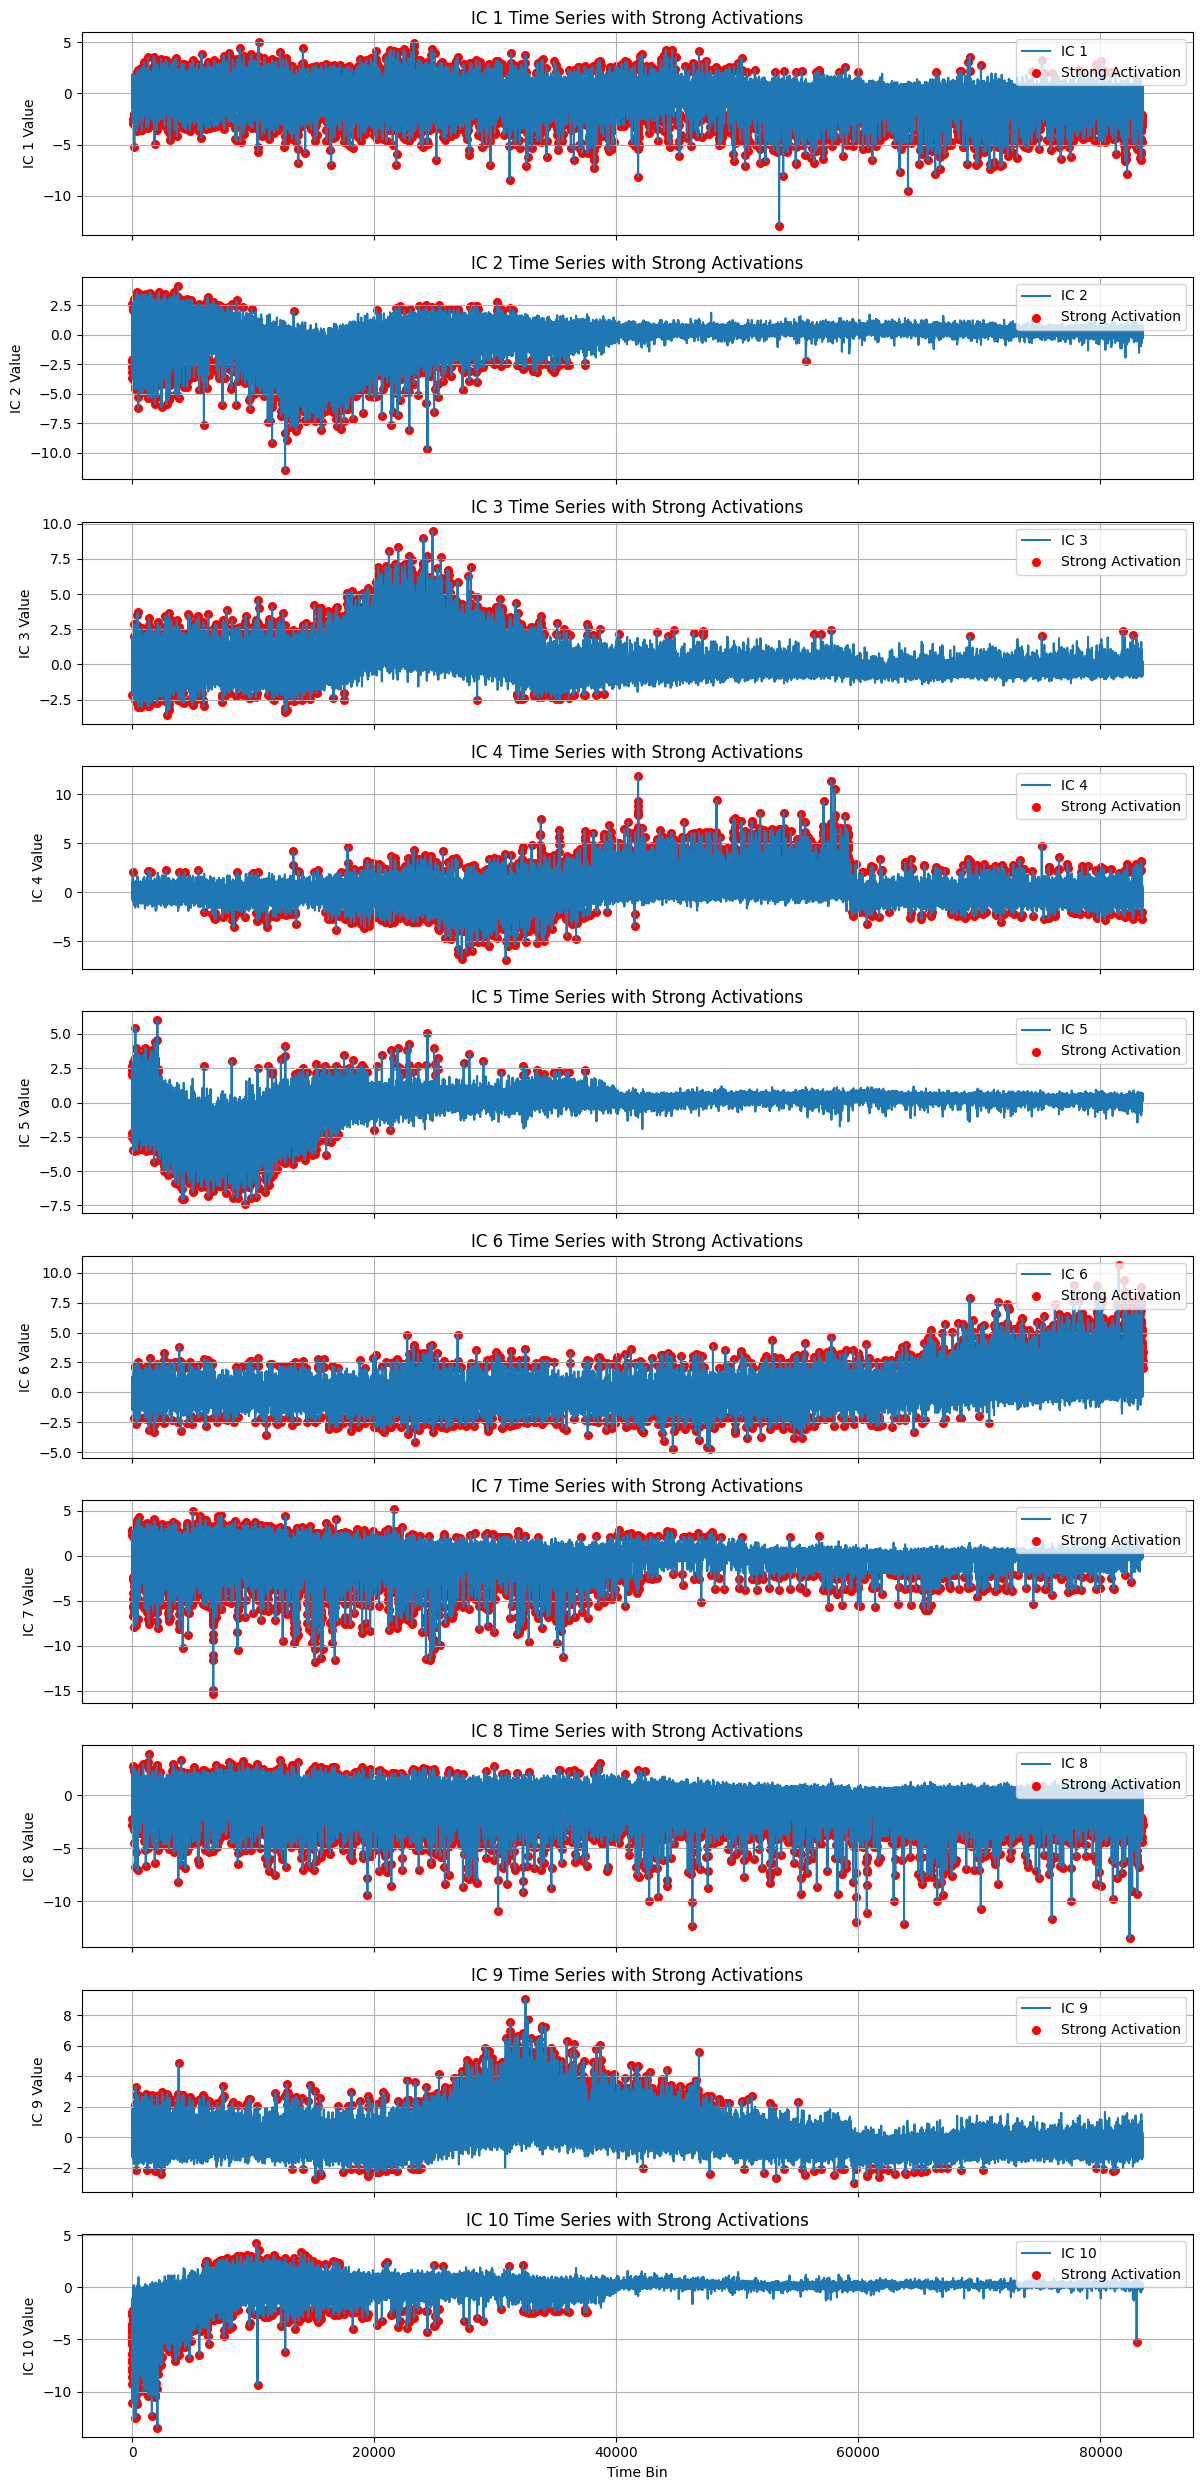

In [55]:
# Find time points with strong ICA component activation
threshold = np.std(ica_components, axis=0) * 2  # 2 standard deviations per component
strong_activation = np.abs(ica_components) > threshold

print(f"\n=== Strong Activation Analysis ===")
for i in range(n_pcs):
    n_strong = np.sum(strong_activation[:, i])
    percentage = 100 * n_strong / len(ica_components)
    print(f"IC {i+1}: {n_strong} time points ({percentage:.1f}%) with strong activation")

# Plot time series of each independent component with strong activations highlighted
fig, axes = plt.subplots(n_pcs, 1, figsize=(12, 2.5 * n_pcs), sharex=True)
if n_pcs == 1:
    axes = [axes]
time = np.arange(ica_components.shape[0])
for i in range(n_pcs):
    ax = axes[i]
    ax.plot(time, ica_components[:, i], label=f'IC {i+1}')
    # Highlight strong activations
    strong_idx = np.where(strong_activation[:, i])[0]
    ax.scatter(strong_idx, ica_components[strong_idx, i], color='red', s=30, label='Strong Activation')
    ax.set_ylabel(f'IC {i+1} Value')
    ax.set_title(f'IC {i+1} Time Series with Strong Activations')
    ax.grid(True)
    ax.legend(loc='upper right')
axes[-1].set_xlabel('Time Bin')
plt.tight_layout()
plt.show()



ICA assembly patterns shape: (10, 101)


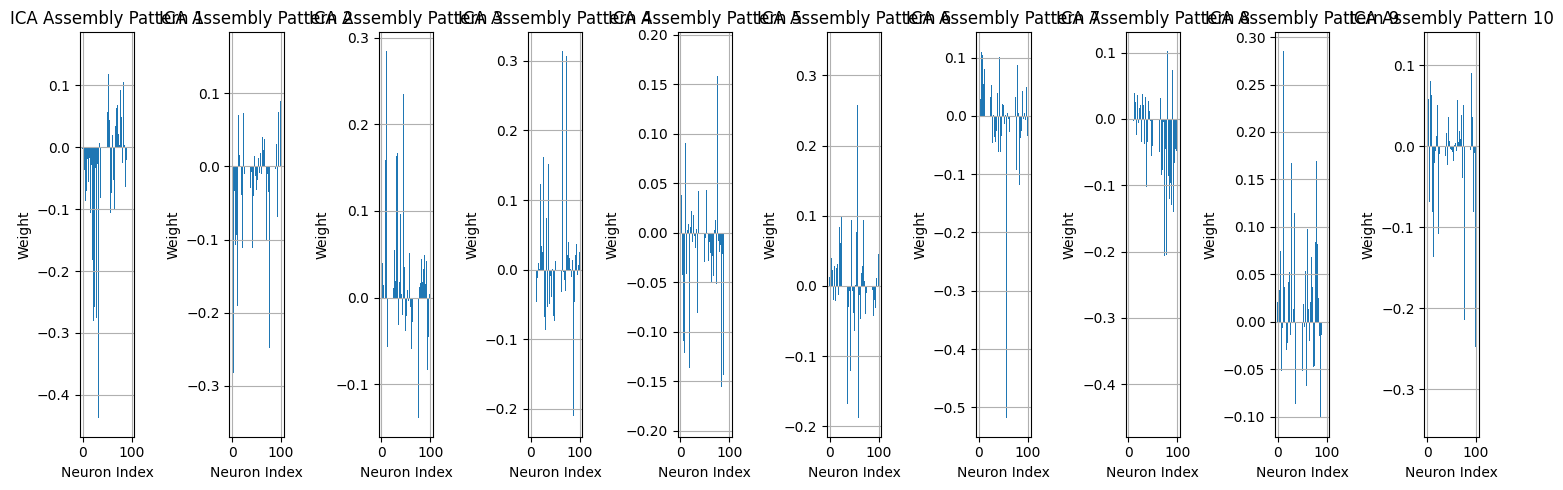

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 1. 1. 0.]]


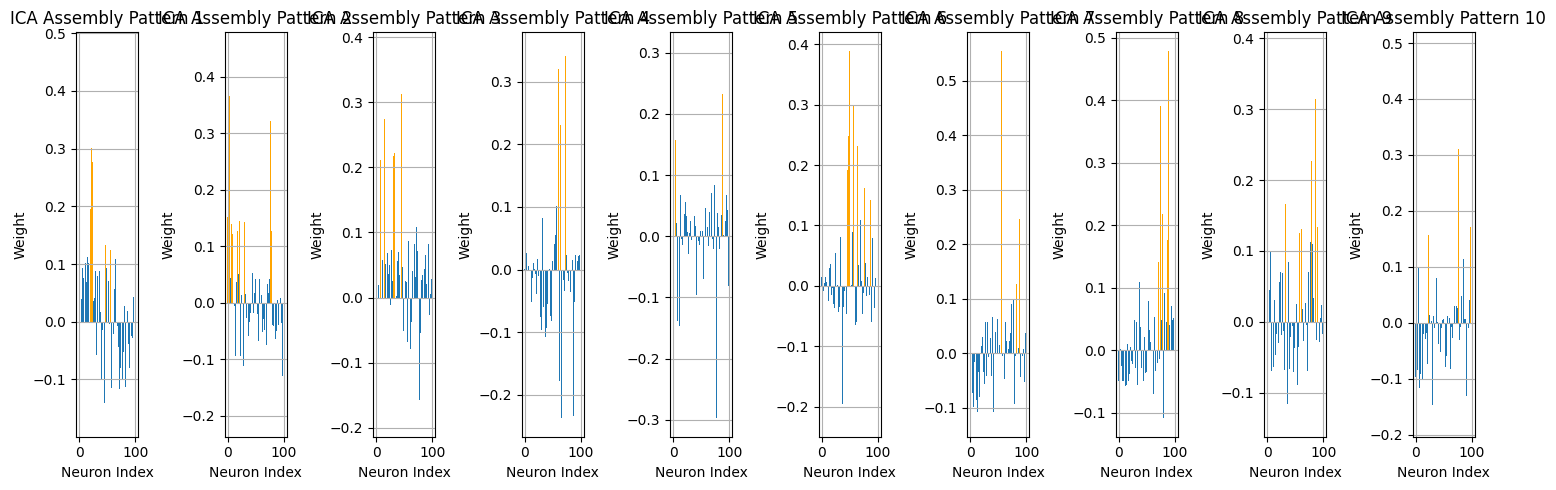

In [56]:
# Project ICA components back to original feature space
# This gives you the neural assembly patterns in the original neuron space
from scipy.linalg import norm

ica_assembly_patterns = unmixing_matrix @ pc_vectors  # Shape: (n_pcs, n_features)

print(f"\nICA assembly patterns shape: {ica_assembly_patterns.shape}")

# Visualize the ICA assembly patterns
plt.figure(figsize=(15, 5))
for i in range(n_pcs):
    plt.subplot(1, n_pcs, i+1)
    plt.bar(range(ica_assembly_patterns.shape[1]), ica_assembly_patterns[i, :])
    plt.title(f'ICA Assembly Pattern {i+1}')
    plt.xlabel('Neuron Index')
    plt.ylabel('Weight')
    plt.grid(True)
plt.tight_layout()
plt.show()

ap_norm_matrix = ica_assembly_patterns
ap_norm_member = np.zeros(ica_assembly_patterns.shape)
for i in range(n_pcs):
    ap = ica_assembly_patterns[i,:]
    ap_norm = ap/norm(ap)
    maxW = max(ap_norm);
    minW = min(ap_norm);
    if abs(minW) > maxW:
        ap_norm = ap_norm*-1
    ap_norm_matrix[i,:] = ap_norm
    threshold = np.mean(ap_norm) + np.std(ap_norm)
    for c in range(len(ap)):
        if ap_norm[c] > threshold:
            ap_norm_member[i,c] = 1
            
print(ap_norm_member)

# Visualize the ICA assembly patterns
plt.figure(figsize=(15, 5))
for i in range(n_pcs):
    plt.subplot(1, n_pcs, i+1)
    plt.bar(range(ap_norm_matrix.shape[1]), ap_norm_matrix[i, :])
    member_indices = np.where(ap_norm_member[i, :] == 1)[0]
    plt.bar(member_indices, ap_norm_matrix[i, member_indices], color='orange')
    plt.title(f'ICA Assembly Pattern {i+1}')
    plt.xlabel('Neuron Index')
    plt.ylabel('Weight')
    plt.grid(True)
plt.tight_layout()
plt.show()

[5907.50249481 5754.74043274 5656.76702881 5595.71334839 5495.98733521
 5462.19329834 5423.9331665  5293.80493164 5265.74475098 5284.00787354
 5258.33355713 5240.04156494 5197.12158203 5144.85540771 5038.62658691
 5026.01287842 4986.94219971 5001.16387939 4979.76184082 5022.24945068
 4952.44934082 4601.70874023 4383.57434082 4373.21716309 4370.72839355
 4357.77099609 4358.47888184 4304.19433594 4328.02075195 4221.74523926
 4237.10021973 4198.06530762 4171.88452148 4142.11987305 4019.98706055
 3982.23278809 3901.12280273 3879.40527344 3651.10791016 3519.95507812
 3481.76342773 3313.24584961 3257.77954102 3235.44970703 3062.02734375
 3060.61767578 3078.01220703 3039.31494141 3039.93017578 2997.875
 2980.51586914 2977.18945312 2945.29394531 2841.22680664 2829.46630859
 2820.06762695 2777.39086914 2799.18066406 2701.69775391 2655.3515625
 2561.23193359 2548.13964844 2543.55371094 2466.36962891 2455.54125977
 1908.88598633 1825.29101562 1615.51757812 1614.76513672 1498.99267578
 1415.918945

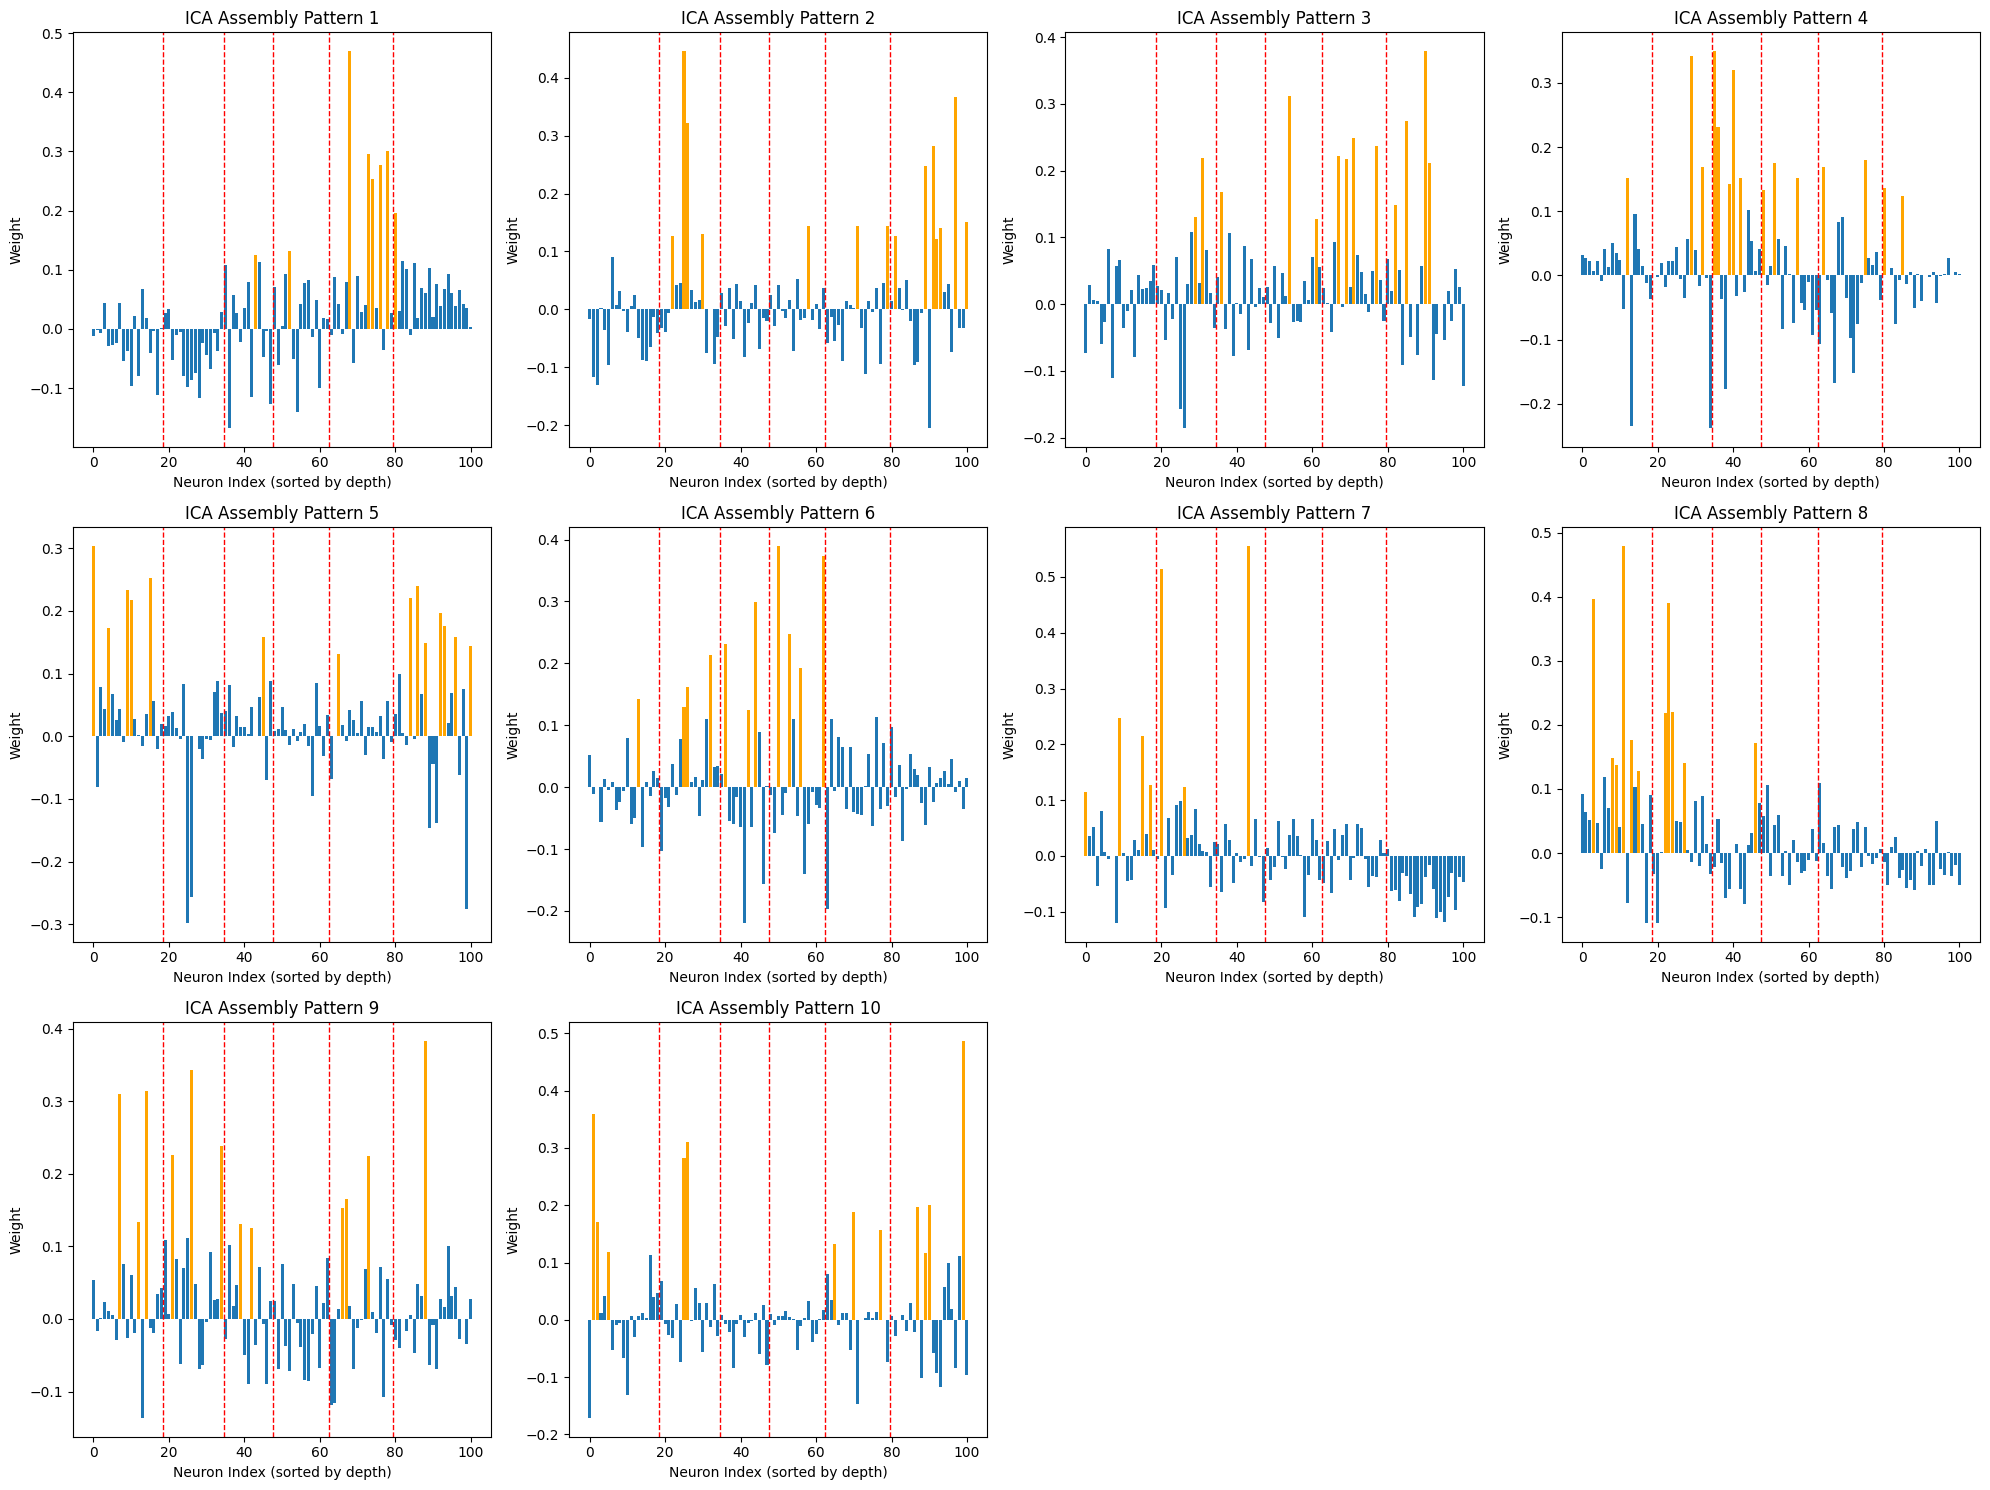

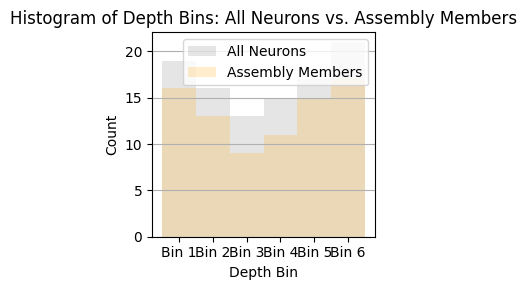

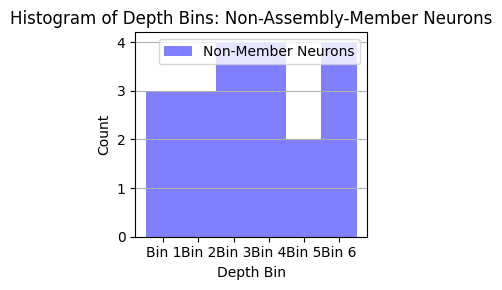

In [57]:
# read in files for cell depth and waveform
import numpy as np
import matplotlib.pyplot as plt

probeDepth = 6000; # this is a dummy as actual value is not on the spreadsheet, this is about average

positions = np.load('/data_store2/neuropixels/preproc/NP128_B1/kilosort/catgt_NP128_B1_g0/NP128_B1_g0_imec1_KS4/spike_positions.npy')
clusters = np.load('/data_store2/neuropixels/preproc/NP128_B1/kilosort/catgt_NP128_B1_g0/NP128_B1_g0_imec1_KS4/spike_clusters.npy')
np.mean(positions[np.where(clusters == 0)], axis=0)

# get the mean depth for each unit
y_vals = np.zeros(len(indicesFinal));
ii = 0;
for i in indicesFinal:
    y_vals[ii] = np.mean(positions[np.where(clusters==i)], axis=0)[1]
    ii += 1

depths = probeDepth - y_vals;
print(depths)
depthBins = np.linspace(np.min(depths)-1,np.max(depths)+1,7) # just space it from min to max since don't know the insertion depth or cortical thickness

# Assign each depth to a depth bin (0-based index)
depth_bin_indices = np.digitize(depths, depthBins)
print("Depth bin indices for each unit:", depth_bin_indices)

# Visualize the ICA assembly patterns
# Determine subplot grid: no more than 4 per row
n_cols = min(4, n_pcs)
n_rows = int(np.ceil(n_pcs / n_cols))
plt.figure(figsize=(5 * n_cols, 5 * n_rows))
for i in range(n_pcs):
    row = i // n_cols
    col = i % n_cols
    plt.subplot(n_rows, n_cols, i+1)
    # Sort neurons by depth and reorder the pattern matrix and membership accordingly
    sorted_indices = np.argsort(depths)
    sorted_depths = depths[sorted_indices]
    sorted_ap_norm_matrix = ap_norm_matrix[:, sorted_indices]
    sorted_ap_norm_member = ap_norm_member[:, sorted_indices]
    sorted_depth_bin_indices = depth_bin_indices[sorted_indices]

    plt.bar(range(sorted_ap_norm_matrix.shape[1]), sorted_ap_norm_matrix[i, :])
    member_indices_sorted = np.where(sorted_ap_norm_member[i, :] == 1)[0]
    plt.bar(member_indices_sorted, sorted_ap_norm_matrix[i, member_indices_sorted], color='orange')
    plt.title(f'ICA Assembly Pattern {i+1}')
    plt.xlabel('Neuron Index (sorted by depth)')
    plt.ylabel('Weight')

    # Draw vertical lines to delineate depth bins
    bin_transitions = np.where(np.diff(sorted_depth_bin_indices) != 0)[0]
    for bt in bin_transitions:
        plt.axvline(x=bt+0.5, color='red', linestyle='--', linewidth=1)

    plt.grid(False)
plt.tight_layout()
plt.show()


# Plot histogram of all neuron depth bins
plt.figure(figsize=(3, 3))
n_bins = len(np.unique(depth_bin_indices))

# Histogram for all neurons
plt.hist(depth_bin_indices, bins=np.arange(0.5, n_bins+1.5, 1), alpha=0.2, color='gray', label='All Neurons')

# Histogram for member neurons (across all assemblies)
member_mask = np.any(ap_norm_member == 1, axis=0)  # shape: (n_neurons,)
member_depth_bins = depth_bin_indices[member_mask]
plt.hist(member_depth_bins, bins=np.arange(0.5, n_bins+1.5, 1), alpha=0.2, color='orange', label='Assembly Members')

plt.xlabel('Depth Bin')
plt.ylabel('Count')
plt.title('Histogram of Depth Bins: All Neurons vs. Assembly Members')
plt.xticks(np.arange(1, n_bins+1), [f'Bin {i}' for i in range(1, n_bins+1)])
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Show a histogram of all cells that are not assembly members
# Find non-member neurons (not in any assembly)
non_member_mask = ~np.any(ap_norm_member == 1, axis=0)  # shape: (n_neurons,)
non_member_depth_bins = depth_bin_indices[non_member_mask]

plt.figure(figsize=(3, 3))
plt.hist(non_member_depth_bins, bins=np.arange(0.5, n_bins+1.5, 1), alpha=0.5, color='blue', label='Non-Member Neurons')
plt.xlabel('Depth Bin')
plt.ylabel('Count')
plt.title('Histogram of Depth Bins: Non-Assembly-Member Neurons')
plt.xticks(np.arange(1, n_bins+1), [f'Bin {i}' for i in range(1, n_bins+1)])
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()



In [ ]:
# now try pca unsupervised clustering of spike templates
import numpy as np
import matplotlib.pyplot as plt

templates_tumor = np.load('/data_store2/neuropixels/preproc/NP128_B1/kilosort/catgt_NP128_B1_g0/NP128_B1_g0_imec0_KS4/spike_detection_templates.npy')
clusters_tumor = np.load('/data_store2/neuropixels/preproc/NP128_B1/kilosort/catgt_NP128_B1_g0/NP128_B1_g0_imec0_KS4/spike_clusters.npy')

print(templates_tumor)
print(templates_tumor.shape)



[290 314 125 ... 122 320 216]
(331462,)
